# Project 1- Group 37

# 1 Packages

In [1]:
import numpy as np
import pandas as pd
import sys
import time
import matplotlib.pyplot as plt
import preProcessing  as prePros 
import LogisticRegression as LR
import modelEvaluation as ME
import NaiveBayes as NB

In [2]:
# Note that all of preProcessing, modelEvaluation, LogisticRegression and NaiveBayes
# are the the project modules 
# details of the functions and mode are in the same folder
# we perfer to use them to make the jupter notebook orderd and and to keep the flow

# 2 Dataset

In [3]:
#parkinsons Dataset
file_path = '../data/adult/adult.csv'
df  = pd.read_csv(file_path, delimiter=',',header=None,names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","y"])
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#fnlwgt is not given any value to the model #education is one to one maping to education number (redundant feature)
del df["education"]
del df["fnlwgt"]     

# 2.1 Data Preprocessing

In [5]:
# Delete spaces and replace speceial characters by NAN
df = prePros.createFlag(df)
df = prePros.cleanSpecialChar(df)
df.head(6)


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y,flag
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ok
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,ok
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,ok
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,ok
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,ok
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,ok


In [6]:
# highlights missing values
df=prePros.flagNan(df)


Instances with missing values:2399


In [7]:
#highlights duplicate instances
df=prePros.flagDuplicates(df)
df.head(5)

 Duplicated Instances:3465


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y,flag
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ok
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,ok
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,ok
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,ok
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,ok


In [8]:
df=prePros.delRows(df,'ok')
# Numbering string  
z=["workclass","marital-status","occupation","relationship","race","sex","native-country","y"]
df=prePros.prepData(df,z)
df.head(5)

Remaining instances:26904


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,5,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,13,2,3,0,4,1,0,0,13,38,0
2,38,2,9,0,5,1,4,1,0,0,40,38,0
3,53,2,7,2,5,0,2,1,0,0,40,38,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0


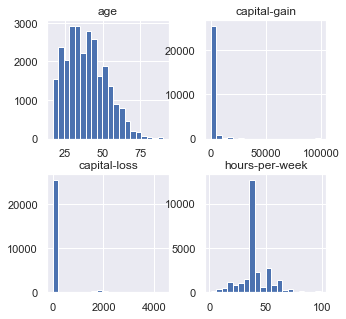

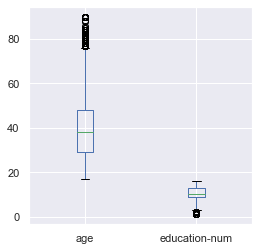

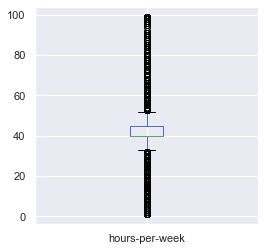

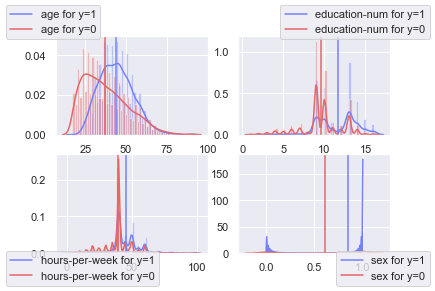

Created Adult.png


In [9]:
plottedFeatures=["age","hours-per-week","capital-loss","capital-gain"]
prePros.draw_histogram(df[plottedFeatures], bins=20, width=5, height=5)

plottedFeaturesboxplot1=["age","education-num"]
plottedFeaturesboxplot2=["hours-per-week"]

xlable = [1 for c in df.columns if c != 'flag']
prePros.draw_boxplots(df, plottedFeaturesboxplot1)
prePros.draw_boxplots(df, plottedFeaturesboxplot2)
y_vars = ["y"]
x_vars = ['age','education-num','hours-per-week','sex']
prePros.plot_dist_by_category(df, x_vars, y_vars, y_vars, "Adult")

In [10]:
#Categorization
#highlights duplicate instances
initial=np.array([0,26,51])
final=np.array([25,50,100])
column=["age"]
    
criteria=[]
for i in range(0,len(initial)):
    criteria.append(df['age'].between(initial[i],final[i])) 
    values=np.linspace(0,len(initial)-1,len(initial))
   
 #criteria,values=createCriteria(df[column],initial,final)
df=prePros.covertRealToCategoral(df,column,criteria,values)

initial=np.array([0,35,46])
final=np.array([34,45,100])

column=["hours-per-week"]
criteria=[]
for i in range(0,len(initial)):
    criteria.append(df['hours-per-week'].between(initial[i],final[i])) 
    values=np.linspace(0,len(initial)-1,len(initial))    
    
df=prePros.covertRealToCategoral(df,column,criteria,values)

    
criteria=[]
column=["capital-gain"]
median=df[column].median()
initial=np.array([0,2])
final=np.array([1,99999])
for i in range(0,len(initial)):
    criteria.append(df['capital-gain'].between(initial[i],final[i])) 
    values=np.linspace(0,len(initial)-1,len(initial))  
        

#criteria,values=createCriteria(df,column,initial,final)
df=prePros.covertRealToCategoral(df,column,criteria,values)
 
criteria=[]
column=["capital-loss"]
median=df[column].median()
initial=np.array([0,2])
final=np.array([1,50000])
for i in range(0,len(initial)):
    criteria.append(df['capital-loss'].between(initial[i],final[i])) 
    values=np.linspace(0,len(initial)-1,len(initial)) 
    

#criteria,values=createCriteria(df,column,initial,final)
df=prePros.covertRealToCategoral(df,column,criteria,values)

df.head(5)
    

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,1.0,5,13,4,0,1,4,1,1.0,0.0,1.0,38,0
1,1.0,4,13,2,3,0,4,1,0.0,0.0,0.0,38,0
2,1.0,2,9,0,5,1,4,1,0.0,0.0,1.0,38,0
3,2.0,2,7,2,5,0,2,1,0.0,0.0,1.0,38,0
4,1.0,2,13,2,9,5,2,0,0.0,0.0,1.0,4,0


In [11]:
#Remove Malformed features
y_temps = ["y","flag"]
x_temps = [var for var in df.columns.tolist() if not var in y_temps]
removed_features=prePros.define_malform_features(df,x_temps,.9)
df=prePros.remove_malform_features(df,removed_features)
df.head(5)


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,y
0,1.0,5,13,4,0,1,4,1,1.0,0
1,1.0,4,13,2,3,0,4,1,0.0,0
2,1.0,2,9,0,5,1,4,1,1.0,0
3,2.0,2,7,2,5,0,2,1,1.0,0
4,1.0,2,13,2,9,5,2,0,1.0,0


In [12]:
# Correlation Coefficients: 
# To study the association between each feature with the output y
y_vars = ["y"]
x_vars = [var for var in df.columns.tolist() if not var in y_vars]
xlable=np.ones((1,32))
corr = df[x_vars + ['y']].corr()
print('The output-y is highly correlated with education-num,hours-per-week and sex ')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

The output-y is highly correlated with education-num,hours-per-week and sex 


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,y
age,1,0.062,0.042,-0.25,-0.0032,-0.23,0.031,0.079,0.14,0.21
workclass,0.062,1,0.038,-0.032,0.014,-0.071,0.051,0.079,0.043,0.017
education-num,0.042,0.038,1,-0.067,0.084,-0.092,0.035,0.011,0.16,0.33
marital-status,-0.25,-0.032,-0.067,1,0.015,0.16,-0.074,-0.11,-0.18,-0.18
occupation,-0.0032,0.014,0.084,0.015,1,-0.064,0.0082,0.067,0.017,0.051
relationship,-0.23,-0.071,-0.092,0.16,-0.064,1,-0.11,-0.59,-0.25,-0.25
race,0.031,0.051,0.035,-0.074,0.0082,-0.11,1,0.086,0.064,0.079
sex,0.079,0.079,0.011,-0.11,0.067,-0.59,0.086,1,0.24,0.22
hours-per-week,0.14,0.043,0.16,-0.18,0.017,-0.25,0.064,0.24,1,0.25
y,0.21,0.017,0.33,-0.18,0.051,-0.25,0.079,0.22,0.25,1


In [13]:
# Correlation Coefficients: 
# To study the association between each feature with the output y
y_vars = ["y"]
x_vars = ['education-num','hours-per-week','sex']
xlable=np.ones((1,32))
corr = df[x_vars + ['y']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
x_vars = ['age','education-num','hours-per-week','sex']
#prePros.plot_dist_by_category(df, x_vars, y_vars, y_vars, "Adult")

In [14]:
# the output and features after removing malformed features
y_temps = ["y","flag","sex","capital-loss","capital-gain"]
x_temps = [var for var in df.columns.tolist() if not var in y_temps]


In [15]:
#Onehot Encoder
df=prePros.oneHotEncoder(df,x_temps)
df.head(5)

,hours-per-week_2.0,hours-per-week_1.0,hours-per-week_0.0,race_4,race_3,race_2,race_1,race_0,relationship_5,relationship_4,...,workclass_4,workclass_3,workclass_2,workclass_1,workclass_0,age_2.0,age_1.0,age_0.0,sex,y
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [16]:
df=prePros.createFlag(df)
df=prePros.flagDuplicates(df)
df.head(5)


 Duplicated Instances:14860


,hours-per-week_2.0,hours-per-week_1.0,hours-per-week_0.0,race_4,race_3,race_2,race_1,race_0,relationship_5,relationship_4,...,workclass_3,workclass_2,workclass_1,workclass_0,age_2.0,age_1.0,age_0.0,sex,y,flag
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,ok
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,ok
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,ok
3,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,ok
4,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,ok


In [17]:
#delete flag
del df["flag"]
df.head(5)

,hours-per-week_2.0,hours-per-week_1.0,hours-per-week_0.0,race_4,race_3,race_2,race_1,race_0,relationship_5,relationship_4,...,workclass_4,workclass_3,workclass_2,workclass_1,workclass_0,age_2.0,age_1.0,age_0.0,sex,y
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


# 2.2 Data Splitting and Normalization

In [18]:
df_test= pd.DataFrame(None)
x_headers,y_header=prePros.define_variables(df,output)
y_header=output
X_train1, y_train, X_test1, y_test=prePros.Data_spliting_2(df,df_test, x_headers,y_header, training_percent=0.85, shuffle=True, random_seed_value=42)
#prepare data for LR
X_train,X_test=prePros.prepXforLR(X_train1,X_test1)


NameError: name 'output' is not defined